In [26]:
# import packages

import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows=200

import seaborn as sns

import gc
from tqdm import tqdm

In [27]:
# download data

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
songs = pd.read_csv('./songs.csv')
song_extra = pd.read_csv('./song_extra_info.csv')
sample = pd.read_csv('./sample_submission.csv')
members = pd.read_csv('./members.csv')

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
id                    int64
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


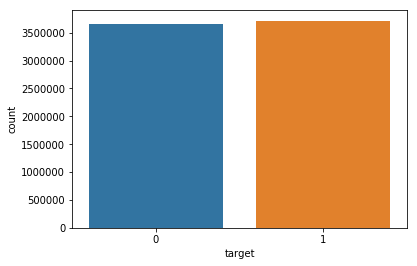

In [30]:

sns.countplot(train['target'])
#it is banlanced

In [31]:
######## DATA PREPARATION

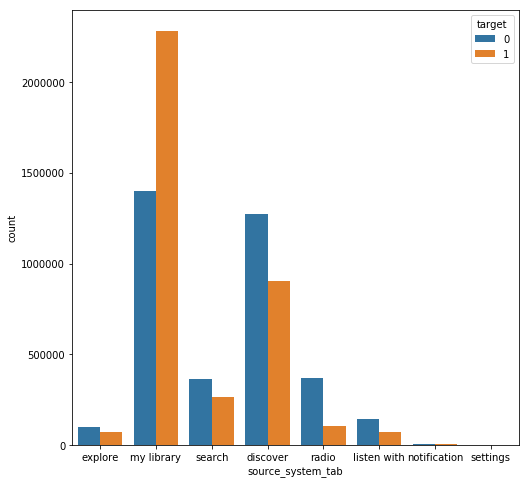

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(train['source_system_tab'],hue=train['target'])

[Text(0, 0, 'online-playlist'),
 Text(0, 0, 'local-playlist'),
 Text(0, 0, 'local-library'),
 Text(0, 0, 'top-hits-for-artist'),
 Text(0, 0, 'album'),
 Text(0, 0, 'song-based-playlist'),
 Text(0, 0, 'radio'),
 Text(0, 0, 'song'),
 Text(0, 0, 'listen-with'),
 Text(0, 0, 'artist'),
 Text(0, 0, 'topic-article-playlist'),
 Text(0, 0, 'my-daily-playlist')]

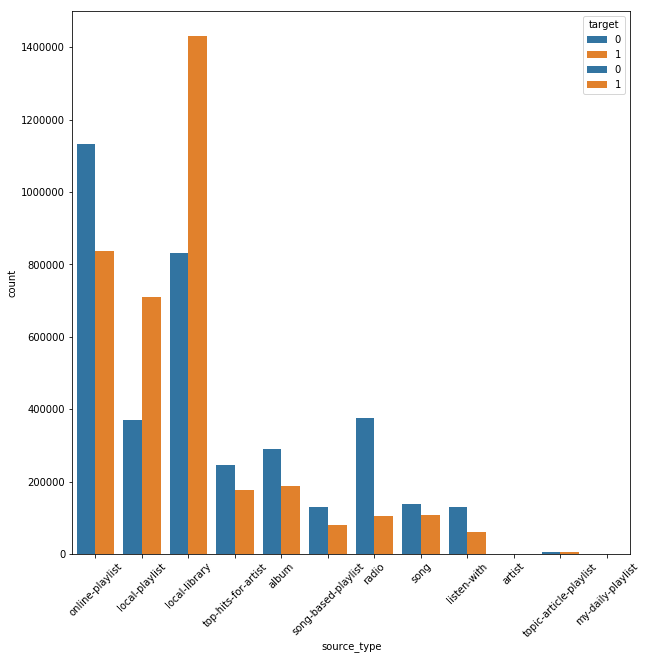

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(train['source_type'],hue=train['target'])
g = sns.countplot(train['source_type'],hue=train['target'])
locs, labels = plt.xticks()
g.set_xticklabels(labels,rotation=45)

In [34]:
members.info()
print("there are 34403 members")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB
there are 34403 members


In [8]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [35]:
members.rename(columns={'bd':'age'},inplace=True)

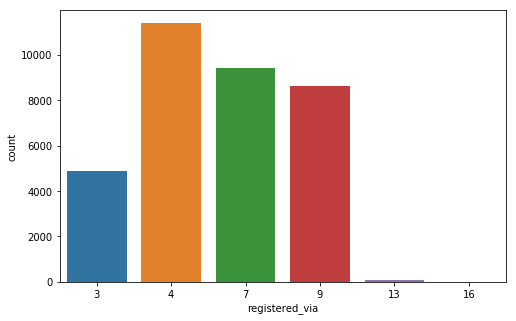

In [36]:
#####  members-registration
f,axarray = plt.subplots(1,1,figsize=(8,5))
sns.countplot(members.registered_via)


In [37]:

## divide registration date and expiration date to year and month, since i think the influence of date only is not siginificant.

members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))

members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))

# the last days from registation to expiration
members['registration_init_time'] = pd.to_datetime(members['registration_init_time'],format="%Y%m%d")
members['expiration_date'] = pd.to_datetime(members['expiration_date'],format="%Y%m%d")
days = members.expiration_date - members.registration_init_time
days = [d.days for d in days]
members['days']=days



In [38]:
### drop the initial 8 digits date data
members = members.drop(['registration_init_time', 'expiration_date' ], axis=1)

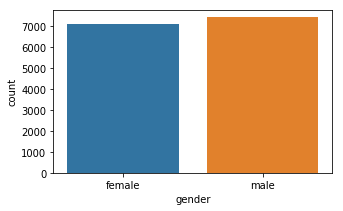

In [39]:
# gender
f,axarray = plt.subplots(1,1,figsize=(5,3))
sns.countplot(members.gender)


[Text(0, 0, '-43'),
 Text(0, 0, '-38'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '31'),
 Text(0, 0, '32'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '36'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '39'),
 Text(0, 0, '40'),
 Text(0, 0, '41'),
 Text(0, 0, '42'),
 Text(0, 0, '43'),
 Text(0, 0, '44'),
 Text(0, 0, '45'),
 Text(0, 0, '46'),
 Text(0, 0, '47'),
 Text(0, 0, '48'),
 Text(0, 0, '49'),
 Text(0, 0, '50'),
 Text(0, 0, '51'),
 Text(0, 0, '52'),
 Text(0, 0, '53'),
 Text(0, 0, '54'),
 Text(0, 0, '55

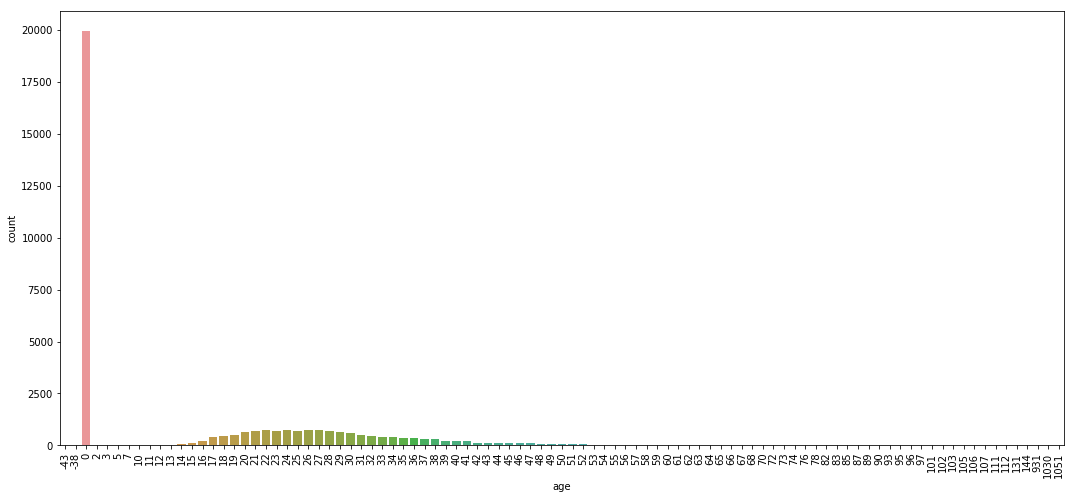

In [40]:
# age
f,axarray = plt.subplots(1,1,figsize=(18,8))
g = sns.countplot(members.age)
locs, labels = plt.xticks()
g.set_xticklabels(labels,rotation=90)

[Text(0, 0, '-43.0'),
 Text(0, 0, '-38.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '11.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '13.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '15.0'),
 Text(0, 0, '16.0'),
 Text(0, 0, '17.0'),
 Text(0, 0, '18.0'),
 Text(0, 0, '19.0'),
 Text(0, 0, '20.0'),
 Text(0, 0, '21.0'),
 Text(0, 0, '22.0'),
 Text(0, 0, '23.0'),
 Text(0, 0, '24.0'),
 Text(0, 0, '25.0'),
 Text(0, 0, '26.0'),
 Text(0, 0, '27.0'),
 Text(0, 0, '28.0'),
 Text(0, 0, '29.0'),
 Text(0, 0, '30.0'),
 Text(0, 0, '31.0'),
 Text(0, 0, '32.0'),
 Text(0, 0, '33.0'),
 Text(0, 0, '34.0'),
 Text(0, 0, '35.0'),
 Text(0, 0, '36.0'),
 Text(0, 0, '37.0'),
 Text(0, 0, '38.0'),
 Text(0, 0, '39.0'),
 Text(0, 0, '40.0'),
 Text(0, 0, '41.0'),
 Text(0, 0, '42.0'),
 Text(0, 0, '43.0'),
 Text(0, 0, '44.0'),
 Text(0, 0, '45.0'),
 Text(0, 0, '46.0'),
 Text(0, 0, '47.0'),
 Text(0, 0, '48.0'),
 Text(0, 0, '49.0'),
 Text(0, 0, '50.0'),
 Text(0, 0, '51

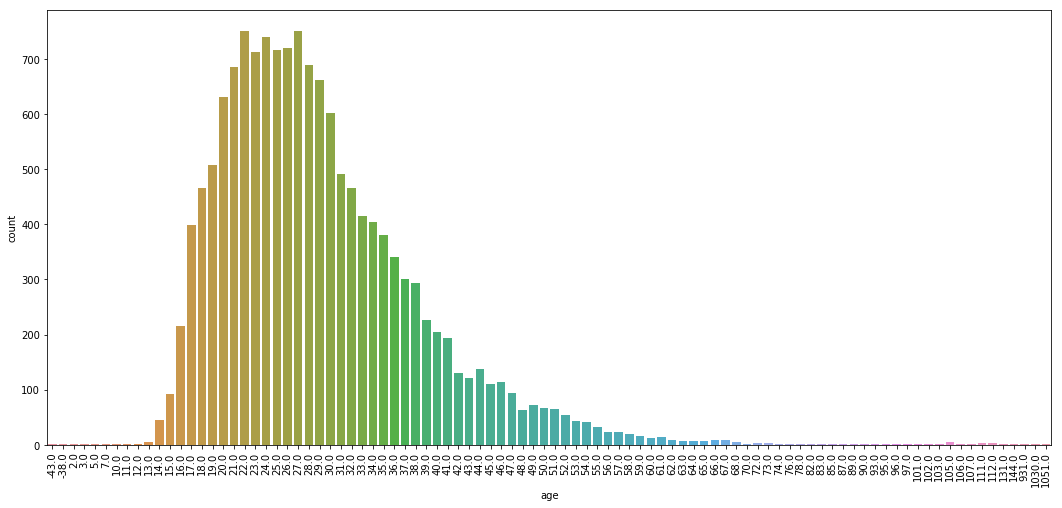

In [41]:
# remove the row with age = 0
members.age=members.age[~members.age.isin([0])]

f,axarray = plt.subplots(1,1,figsize=(18,8))
g = sns.countplot(members.age)
locs, labels = plt.xticks()
g.set_xticklabels(labels,rotation=90)

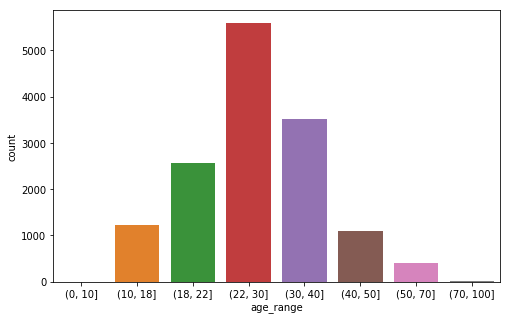

In [42]:
# for age, there are lot missing values just like gender.
# we can divide the age to different ranges
members['age_range'] = pd.cut(members['age'],bins=[0,10,18,22,30,40,50,70,100])

plt.figure(figsize=(8,5))
sns.countplot(members['age_range'])

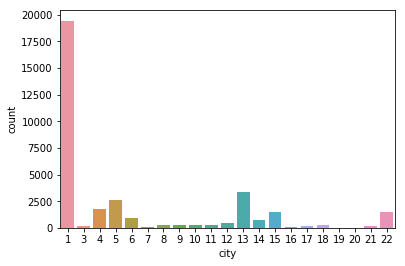

In [43]:
### members-city

sns.countplot(members.city)

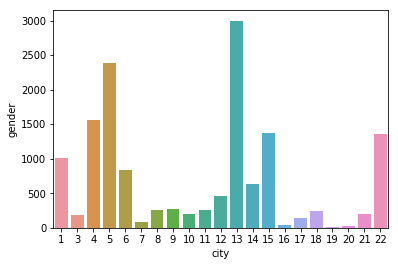

In [44]:

agehist = members.groupby(['city'],as_index=False).count()
sns.barplot(x=agehist['city'],y=agehist['gender'])

In [45]:
###### songs and songs extra

songs = songs.merge(song_extra, on='song_id', how='left')
isrc = songs['isrc']
songs['country'] = isrc.str.slice(0, 2)
songs['publisher'] = isrc.str.slice(2, 5)
songs['year_released'] = isrc.str.slice(5, 7).astype(float)
songs['year_released'] = songs['year_released'].apply(lambda x: 2000+x if x < 18 else 1900+x)
songs=songs.drop(["isrc"],axis=1)
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296320 entries, 0 to 2296319
Data columns (total 11 columns):
song_id          object
song_length      int64
genre_ids        object
artist_name      object
composer         object
lyricist         object
language         float64
name             object
country          object
publisher        object
year_released    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 210.2+ MB


In [46]:
## merge train set with members set
train = train.merge(members, on='msno', how='left')
test = test.merge(members, on='msno', how='left')

## merge train set with songs set
train = train.merge(songs, on='song_id', how='left')
test = test.merge(songs, on='song_id', how='left')

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 26 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
city                  int64
age                   float64
gender                object
registered_via        int64
registration_year     int64
registration_month    int64
expiration_year       int64
expiration_month      int64
days                  int64
age_range             category
song_length           float64
genre_ids             object
artist_name           object
composer              object
lyricist              object
language              float64
name                  object
country               object
publisher             object
year_released         float64
dtypes: category(1), float64(4), int64(8), object(13)
memory usage: 1.4+ GB


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556790 entries, 0 to 2556789
Data columns (total 26 columns):
id                    int64
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
city                  int64
age                   float64
gender                object
registered_via        int64
registration_year     int64
registration_month    int64
expiration_year       int64
expiration_month      int64
days                  int64
age_range             category
song_length           float64
genre_ids             object
artist_name           object
composer              object
lyricist              object
language              float64
name                  object
country               object
publisher             object
year_released         float64
dtypes: category(1), float64(4), int64(8), object(13)
memory usage: 509.6+ MB


In [48]:
#######
#
import gc
del members, songs, song_extra
gc.collect()

155

In [49]:
print("Merging is done, save them as new datasets.")

Merging is done, save them as new dataset.


In [50]:
train.to_csv('train_merged.csv', index=False)
test.to_csv('test_merged.csv', index=False)